<a href="https://colab.research.google.com/github/BrunoWLP/Atividades-Carnaval/blob/main/Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividades de Carnaval 🥳

## **Regressão é quase amor**

Motivação
A cerveja é uma das bebidas mais democráticas e consumidas do mundo. Não sem razão, é perfeito para quase todas as
situações, desde happy hour até grandes festas de casamento. Se você só pensar nisso, você já sente vontade de tomar
uma cerveja, você não está sozinho.
A verdade é que em todo o mundo, milhares de pessoas consomem a bebida regularmente e também em diferentes
situações. Mas você já parou para pensar em quais países são os que mais consomem cerveja no mundo? A primeira que
lhe veio à cabeça foi a Alemanha? Bem, saiba que não é assim.
A resposta a essa pergunta é retumbante: a República Tcheca. Segundo pesquisa da empresa japonesa de bebidas Kirin, o
país lidera a tabela de consumo de cerveja per capita por 23 anos consecutivos.
Em 2015, o ano mais recente para o qual existem estatísticas disponíveis, os tchecos beberam 142,4 litros por pessoa. Isso
é o equivalente a 250 canecas—ou uma a cada 35 horas. Mas, dado que é improvável que os menores contribuam para esse
número, é seguro supor que o bebedor médio de cerveja provavelmente bebe um pouco mais.
Áustria e Alemanha vêm em terceiro e quarto, Polônia em sexto e Irlanda em sétimo. No entanto, há algumas surpresas. Em
segundo lugar estão as Seychelles, uma classificação elevada que atribuímos ao clima quente e ao grande número de
turistas.
Otimizando a venda de cervejas no Carnaval 2022 (se ele existisse)

#### Coletamos alguns dados de São Paulo—Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos (média) para desenvolver um estudo e precisamos da sua ajuda:<br>
#### Se existisse um carnaval? E eu quisesse escolher o melhor dia para vender cervejas em SP, qual dos dias abaixo você sugeriria e por que?
1. 27/02/2022
2. 28/02/2022
3. 01/03/2022
4. 02/03/2022

*Plus: Se pudesse indicar o melhor bairro de SP para vender cervejas no dia apontado por vc, qual seria? Justifique sua resposta com argumentos e dados. (Usado para consulta https://falauniversidades.com.br/os-bairros-de-sao-paulo-preferidos-pelos-universitarios/)*

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/consumo_cerveja.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [61]:
df.head(3)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814


## Tratamento do dataset

In [62]:
df_nonull = df.dropna()
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [63]:
df_nonull['Temperatura Media (C)'] = df_nonull['Temperatura Media (C)'].str.replace(',', '.')
df_nonull['Temperatura Minima (C)'] = df_nonull['Temperatura Minima (C)'].str.replace(',', '.')
df_nonull['Temperatura Maxima (C)'] = df_nonull['Temperatura Maxima (C)'].str.replace(',', '.')
df_nonull['Precipitacao (mm)'] = df_nonull['Precipitacao (mm)'].str.replace(',', '.')

In [64]:
# var = ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']
# df_nonull[var] = df[var].apply(lambda s: s.replace('\.', ',', regex=True))
# df_nonull.head()

In [65]:
df_nonull['Data'] = pd.to_datetime(df_nonull['Data'])

In [66]:
var = ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']
df_nonull[var] = df_nonull[var].astype('float')

In [67]:
df_nonull.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


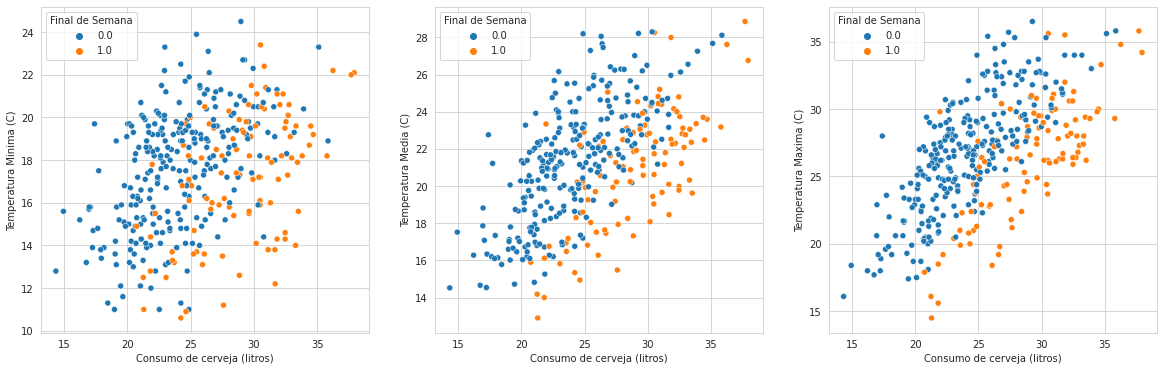

In [68]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 3, figsize=(20,6))

ax0 = sns.scatterplot('Consumo de cerveja (litros)', 'Temperatura Minima (C)', hue='Final de Semana', data=df_nonull, ax=ax[0])
ax1 = sns.scatterplot('Consumo de cerveja (litros)', 'Temperatura Media (C)', hue='Final de Semana', data=df_nonull, ax=ax[1])
ax2 = sns.scatterplot('Consumo de cerveja (litros)', 'Temperatura Maxima (C)', hue='Final de Semana', data=df_nonull, ax=ax[2])

plt.show()

Nota-se que há uma tendência de maior consumo nos fins de semana, e também quando a temperatura é maior.

## Análise histórica

Como foram as condições em 2015?

In [69]:
# Removendo as datas inexistente de fevereiro (28-31)

consulta = df_nonull.loc[(df_nonull['Data'] > '2015-01-27') & (df_nonull['Data'] < '2015-02-01')]
consulta

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
27,2015-01-28,25.68,20.1,29.9,4.9,0.0,22.603
28,2015-01-29,25.00,21.5,29.2,0.0,0.0,22.696
29,2015-01-30,22.80,20.9,26.9,0.0,0.0,26.845
30,2015-01-31,21.64,18.5,24.3,0.2,1.0,27.030


In [70]:
consulta.index.values

array([27, 28, 29, 30])

In [71]:
historico = df_nonull.drop(index=(consulta.index.values))
historico.loc[20:35]

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
20,2015-01-21,25.32,22.7,30.9,0.0,0.0,29.130
21,2015-01-22,21.74,19.2,26.1,31.0,0.0,25.795
22,2015-01-23,21.04,18.5,26.1,3.6,0.0,21.784
23,2015-01-24,23.12,19.0,29.4,13.0,1.0,28.348
24,2015-01-25,24.40,18.1,30.0,0.0,1.0,31.088
25,2015-01-26,22.40,18.9,28.7,20.8,0.0,21.520
26,2015-01-27,23.60,20.5,28.7,1.2,0.0,29.972
31,2015-02-01,24.16,20.6,28.0,0.0,1.0,32.057
32,2015-02-02,22.48,20.7,26.5,4.5,0.0,24.097
33,2015-02-03,23.16,18.0,31.1,1.6,0.0,31.655


In [72]:
historico = historico.reset_index(drop=True)

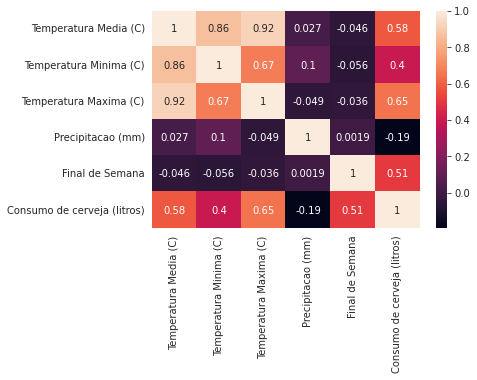

In [73]:
sns.heatmap(historico.iloc[:, 1:].corr(), annot=True)

Baseado na tabela de correlação, os próximos passos para prever o melhor dia para vender cerveja:

- Entre as categorias de temperatura, vemos que a correlação mais forte é com a temperatura máxima. Ou seja, esta será nossa variável de interesse;
- A precipitação apresenta uma correlação negativa, apesar de contra-intuitivo;
- As pessoas consomem mais cerveja nos fins de semana.

In [74]:
carnaval15 = historico.loc[(historico['Data'] >= '2015-02-27') & (historico['Data'] <= '2015-03-02')]
carnaval15

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
53,2015-02-27,24.64,20.4,31.4,0.6,0.0,26.241
54,2015-02-28,22.40,19.7,27.7,0.0,1.0,26.467
55,2015-03-01,21.26,18.2,26.3,3.0,1.0,27.475
56,2015-03-02,22.16,17.2,29.2,0.0,0.0,28.749


Conferindo as correlações apenas nas datas do carnaval (2015).

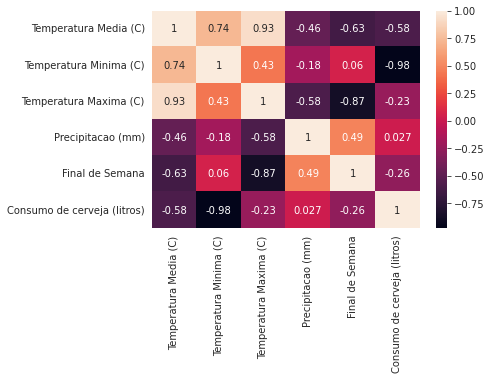

In [75]:
sns.heatmap(carnaval15.iloc[:, 1:].corr(), annot=True)

Os valores são muito diferentes dos vistos anteriormente, dada a baixa quantidades de registros. Porém é possível construir um modelo de regessão linear utilizando poucos dados. Neste caso a técnica utilizada será Ridge Regression.<br>

In [76]:
print(historico.shape)
print(carnaval15.shape)

(361, 7)
(4, 7)


In [77]:
from sklearn.linear_model import Ridge

In [103]:
rr = Ridge()

Regressão Linear Simples

In [118]:
X = historico[['Temperatura Maxima (C)']]
y = historico[['Consumo de cerveja (litros)']]

rr.fit(X, y)
rr.predict(X)
rr.score(X, y)

0.41927694918106284

In [119]:
X = carnaval15[['Temperatura Maxima (C)']]
y = carnaval15[['Consumo de cerveja (litros)']]

rr.fit(X, y)
y_hat = rr.predict(X)
rr.score(X, y)

0.053416264923824786

Regressão Linear Múltipla

In [122]:
# variáveis X (preditora), Y (alvo)
X = historico[['Temperatura Maxima (C)', 'Final de Semana']]
y = historico[['Consumo de cerveja (litros)']]

rr.fit(X, y)
y_hat = rr.predict(X)
rr.score(X, y)


0.6996086916389657

In [121]:
rr_carnaval = Ridge()
X = carnaval15[['Temperatura Maxima (C)', 'Final de Semana']]
y = carnaval15[['Consumo de cerveja (litros)']]

rr_carnaval.fit(X, y)
y_hat = rr_carnaval.predict(X)
rr_carnaval.score(X, y)

0.3514512751730785

De todos os modelos, o que apresentou o melhor score foi com o que utilizou os dados do ano todo e com múltiplos preditores.

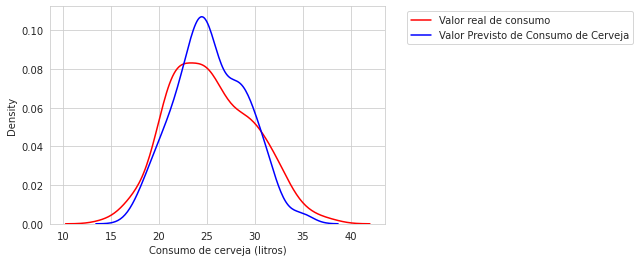

In [144]:
ax1 = sns.distplot(historico['Consumo de cerveja (litros)'], hist=False, color='r', label='Valor real de consumo')
sns.distplot(y_hat, hist=False, ax=ax1, color='b', label='Valor Previsto de Consumo de Cerveja')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Compração dos modelos utilizando Regressão Linear

In [145]:
from sklearn.linear_model import LinearRegression

In [154]:
lm = LinearRegression()


In [155]:
X = carnaval15[['Temperatura Maxima (C)', 'Final de Semana']]
y = carnaval15[['Consumo de cerveja (litros)']]

lm.fit(X, y)
y_hat = lm.predict(X)
lm.score(X, y)

0.9686722336478668

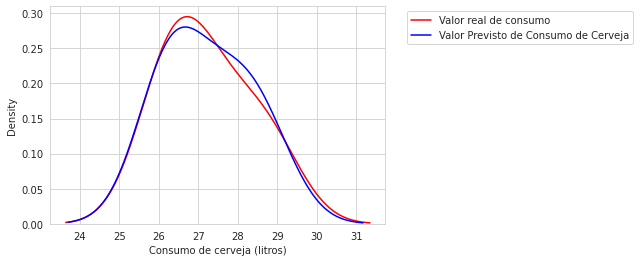

In [156]:
ax2 = sns.distplot(carnaval15['Consumo de cerveja (litros)'], hist=False, color='r', label='Valor real de consumo')
sns.distplot(y_hat, hist=False, ax=ax2, color='b', label='Valor Previsto de Consumo de Cerveja')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [158]:
lm = LinearRegression()

X = historico[['Temperatura Maxima (C)', 'Final de Semana']]
y = historico[['Consumo de cerveja (litros)']]

lm.fit(X, y)
y_hat = lm.predict(X)
lm.score(X, y)

0.6996592428265364

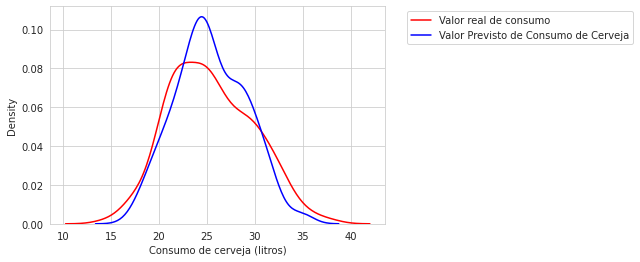

In [161]:
ax2 = sns.distplot(historico['Consumo de cerveja (litros)'], hist=False, color='r', label='Valor real de consumo')
sns.distplot(y_hat, hist=False, ax=ax2, color='b', label='Valor Previsto de Consumo de Cerveja')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()